In [1]:
import pandas as pd
import seaborn as sb

In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv("claimants.csv")

In [4]:
df.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [5]:
#Droping first column
df.drop(["CASENUM"],inplace=True,axis = 1)

In [6]:
#cat_cols = [“ATTORNEY”,”CLMSEX”,”SEATBELT”,”CLMINSUR”] #cont_cols = [“CLMAGE”,”LOSS”] #Getting the barplot for the categorical columns

<AxesSubplot:xlabel='ATTORNEY', ylabel='count'>

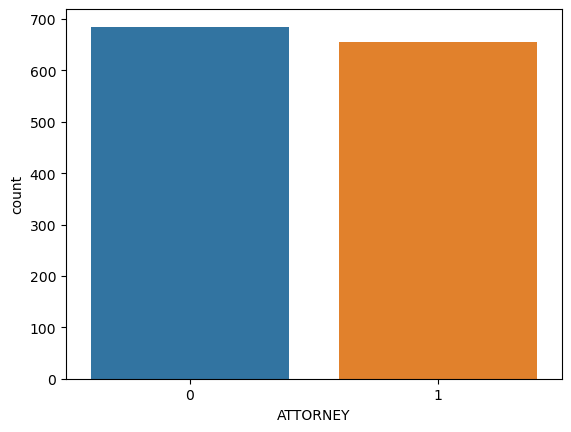

In [7]:
sb.countplot(x="ATTORNEY",data=df)

<AxesSubplot:xlabel='ATTORNEY'>

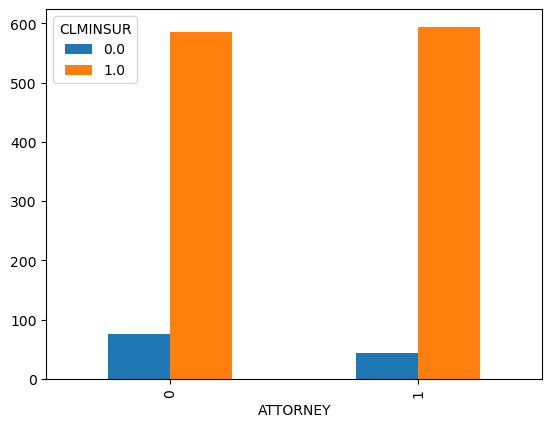

In [8]:
pd.crosstab(df.ATTORNEY,df.CLMINSUR).plot(kind="bar")

<AxesSubplot:xlabel='CLMSEX', ylabel='count'>

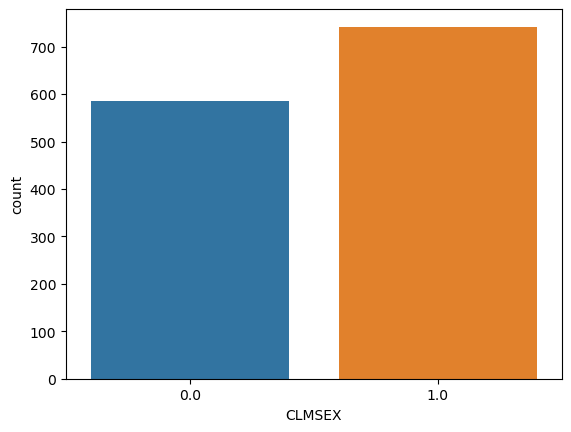

In [9]:
sb.countplot(x="CLMSEX",data=df)

<AxesSubplot:xlabel='CLMSEX'>

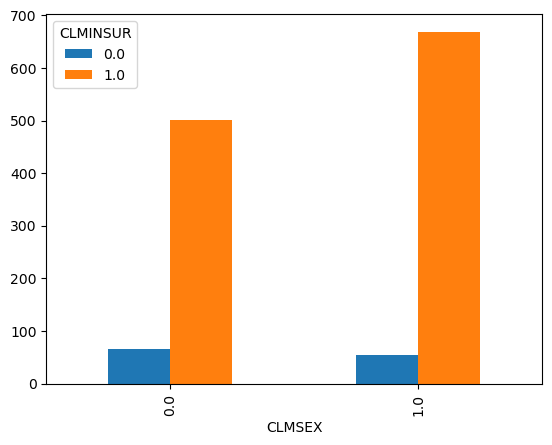

In [10]:
pd.crosstab(df.CLMSEX,df.CLMINSUR).plot(kind="bar")

<AxesSubplot:xlabel='SEATBELT', ylabel='count'>

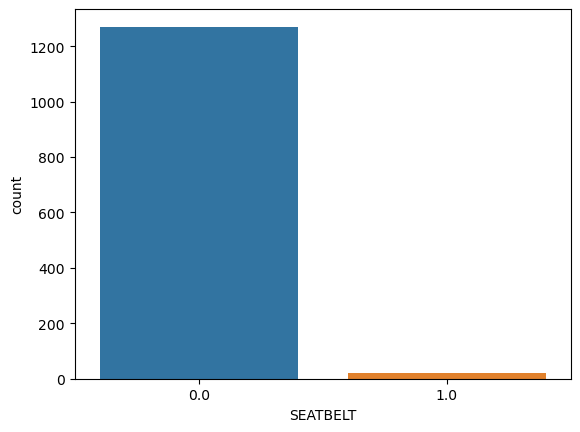

In [11]:
sb.countplot(x="SEATBELT",data=df)

<AxesSubplot:xlabel='SEATBELT'>

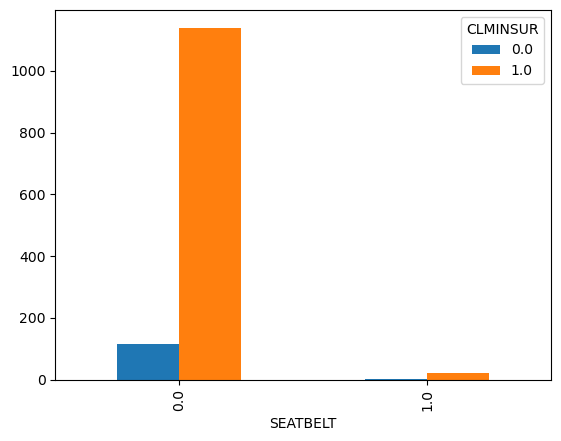

In [12]:
pd.crosstab(df.SEATBELT,df.CLMINSUR).plot(kind="bar")

<AxesSubplot:xlabel='CLMINSUR', ylabel='count'>

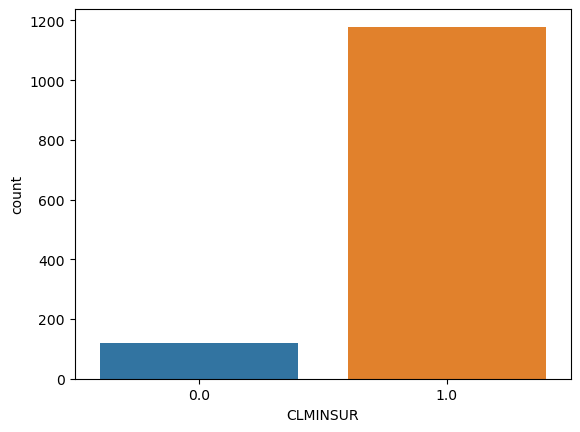

In [13]:
sb.countplot(x="CLMINSUR",data=df)

In [14]:
#Data Distribution – Boxplot of continuous variables wrt to each category of categorical columns

<AxesSubplot:>

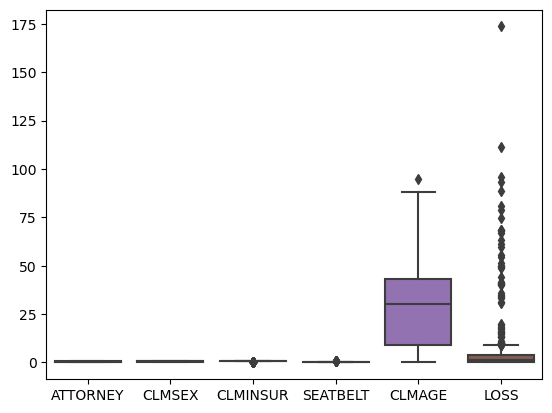

In [15]:
sb.boxplot(data =df,orient = "v")

<AxesSubplot:xlabel='ATTORNEY', ylabel='CLMAGE'>

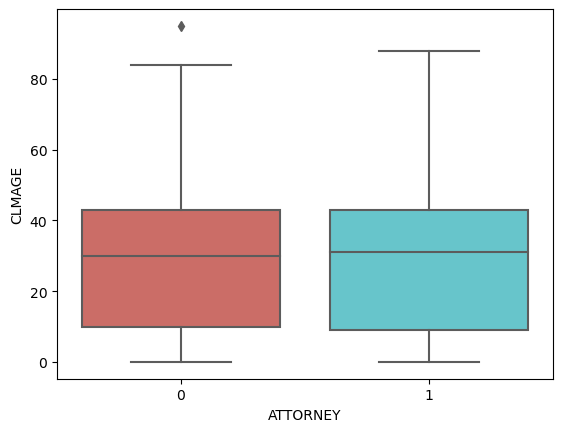

In [16]:
sb.boxplot(x="ATTORNEY",y="CLMAGE",data=df,palette = "hls")

<AxesSubplot:xlabel='ATTORNEY', ylabel='LOSS'>

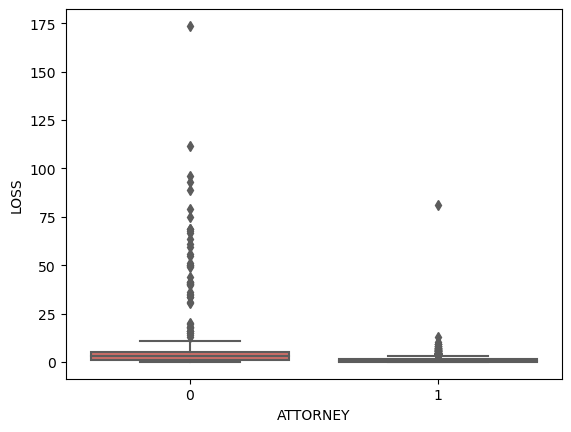

In [17]:
sb.boxplot(x="ATTORNEY",y="LOSS",data=df,palette="hls")

<AxesSubplot:xlabel='CLMSEX', ylabel='CLMAGE'>

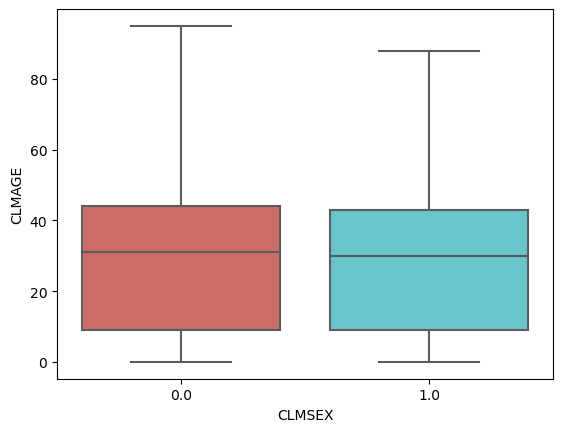

In [18]:
sb.boxplot(x="CLMSEX",y="CLMAGE",data=df,palette="hls")

<AxesSubplot:xlabel='CLMSEX', ylabel='LOSS'>

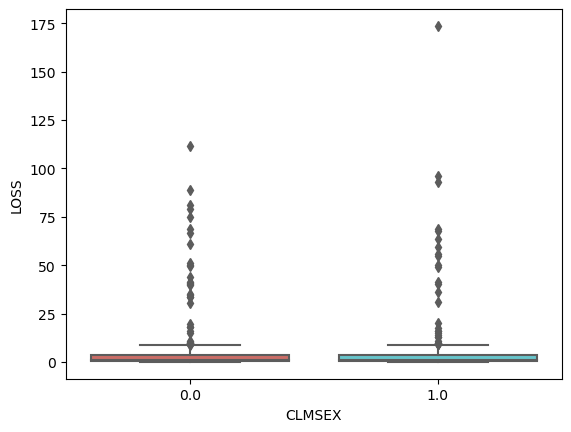

In [19]:
sb.boxplot(x="CLMSEX",y="LOSS",data=df,palette="hls")

<AxesSubplot:xlabel='SEATBELT', ylabel='CLMAGE'>

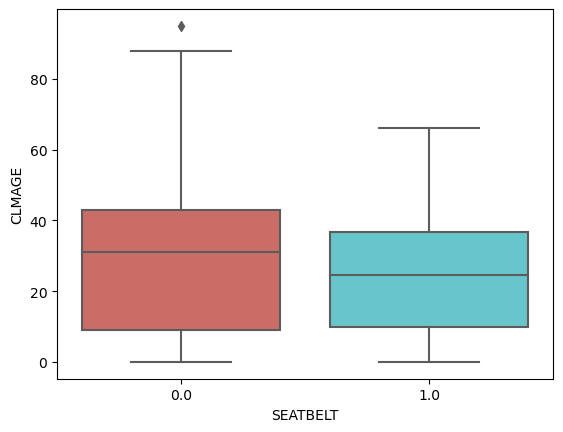

In [20]:
sb.boxplot(x="SEATBELT",y="CLMAGE",data=df,palette="hls")

<AxesSubplot:xlabel='SEATBELT', ylabel='LOSS'>

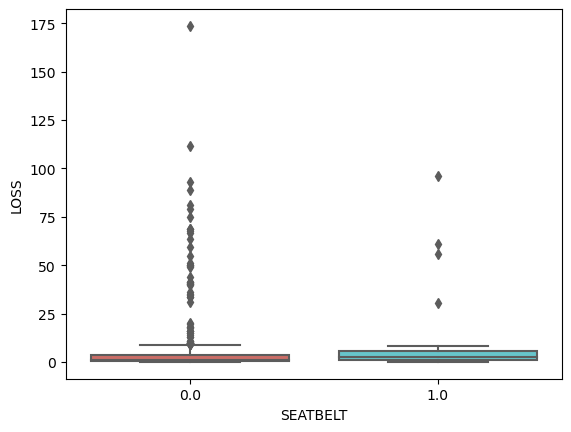

In [21]:
sb.boxplot(x="SEATBELT",y="LOSS",data=df,palette="hls")

<AxesSubplot:xlabel='CLMINSUR', ylabel='CLMAGE'>

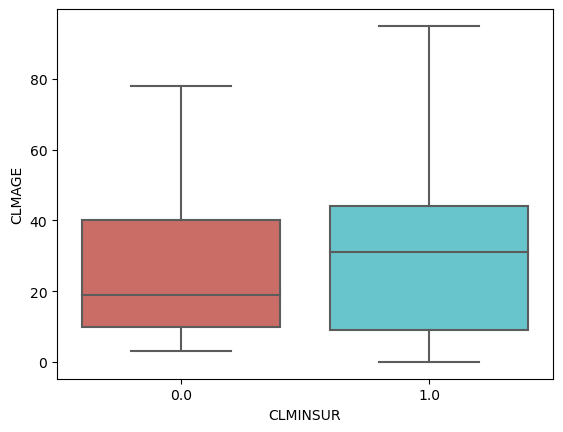

In [22]:
sb.boxplot(x="CLMINSUR",y="CLMAGE",data=df,palette="hls")

<AxesSubplot:xlabel='CLMINSUR', ylabel='LOSS'>

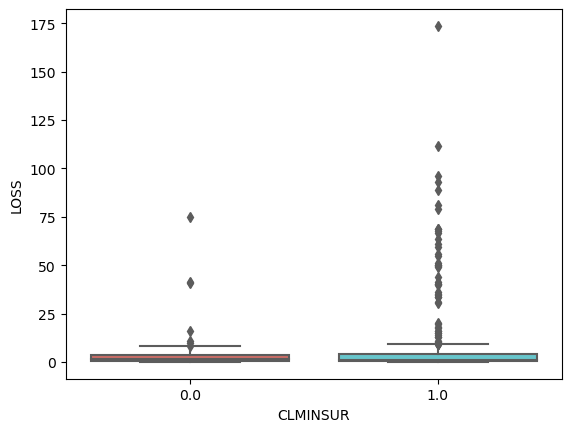

In [23]:
sb.boxplot(x="CLMINSUR",y="LOSS",data=df,palette="hls")

In [24]:
#To get the count of null values in the data

In [25]:
df.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [26]:
df.shape # 1340 6 => Before dropping null values

(1340, 6)

In [27]:
#To drop null values ( dropping rows)

In [28]:
df.dropna().shape # 1096 6 => After dropping null values

(1096, 6)

In [29]:
##Fill nan values with mode of the categorical column

In [30]:
df["CLMSEX"].fillna(1,inplace=True) # df.CLMSEX.mode() = 1

In [31]:
df["CLMINSUR"].fillna(1,inplace=True) # df.CLMINSUR.mode() = 1

In [32]:
df["SEATBELT"].fillna(0,inplace=True) # df.SEATBELT.mode() = 0

In [33]:
df.CLMAGE.fillna(28.4144,inplace=True) # df.CLMAGE.mean() = 28.4

In [34]:
df.isnull().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [35]:
#Model building

In [36]:
df.shape

(1340, 6)

In [37]:
X = df.iloc[:,[1,2,3,4,5]]

In [38]:
Y = df.iloc[:,0]

In [39]:
classifier = LogisticRegression()

In [40]:
classifier.fit(X,Y)

LogisticRegression()

In [41]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(multi_class='warn', solver='warn')

In [42]:
classifier.coef_ # coefficients of features 

array([[ 0.31711334,  0.5055713 , -0.52814335,  0.0066041 , -0.3224325 ]])

In [43]:
classifier.predict_proba (X) # Probability values 

array([[9.99974075e-01, 2.59253820e-05],
       [4.95386951e-01, 5.04613049e-01],
       [4.25082812e-01, 5.74917188e-01],
       ...,
       [2.85349951e-01, 7.14650049e-01],
       [6.86685509e-01, 3.13314491e-01],
       [3.38781941e-01, 6.61218059e-01]])

In [44]:
y_pred = classifier.predict(X)

In [45]:
df["y_pred"] = y_pred

In [46]:
y_prob = pd.DataFrame(classifier.predict_proba(X.iloc[:,:]))

In [47]:
new_df = pd.concat([df,y_prob],axis=1)

In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
confusion_matrix = confusion_matrix(Y,y_pred)

In [50]:
print (confusion_matrix)

[[435 250]
 [147 508]]
